7-2. 인공 신경망(Artificial Neural Network)

1. 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)
* 다층 퍼셉트론(MLP)과 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망

2. 전결합층(Fully-connected layer, FC, Dense layer)
* 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 전결합층 또는 완전연결층이라고 한다. \
앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층이다. 동일한 의미로 밀집층(Dense layer)이라고 하는데, \
케라스에서 밀집층을 구현할 때 Dense()를 사용

3. 활성화 함수(Activation Function)
* 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation function)라고 한다. \
활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(2) 계단 함수(Step function)

C:\Users\rladu\AppData\Local\Temp\ipykernel_6284\2531877490.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


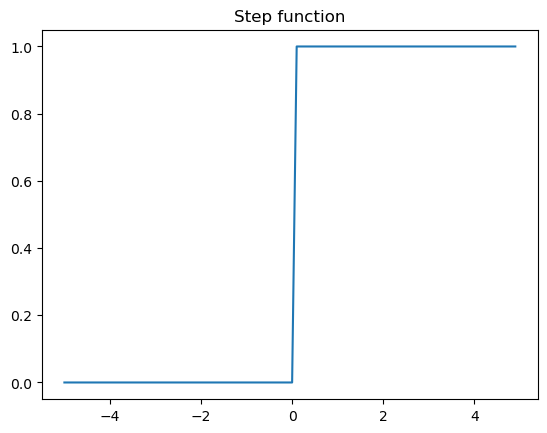

In [3]:
def step(x) :
    return np.array(x > 0, dtype = np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0 부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step function')
plt.plot(x,y)
plt.show()

계단 함수는 거의 사용되지 않지만, 퍼셉트론을 통해 인공 신경망을 처음 배울 때 접하게 되는 활성화 함수이다.

(3) 시그모이드 함수(Sigmoid function)와 기울기 소실
1. 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산 
2. 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산 
3. 손실을 미분을 통해서 기울기(gradient)를 구하고 
4. 이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)을 수행

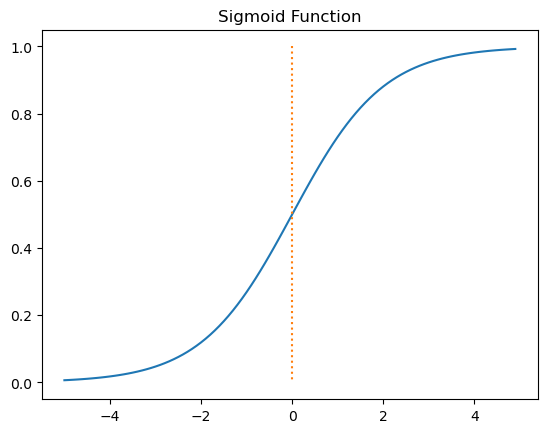

In [4]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x) :
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

시그모이드 함수를 미분한 값은 적어도 0.25 이하의 값이 되는데, \
시그모이드 함수를 활성화 함수로하는 인공 신경망의 층을 쌓는다면, 가중치와 편향을 업데이트 하는 과정인 역전파 과정에서 \
0에 가까운 값이 누적해서 곱해지게 되면서, 앞단에는 기울기(미분값)가 잘 전달되지 않게 된다. 이를 기울기 소실이라고 한다.\
따라서 시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용한다.(은닉층에서 사용은 지양)

(4) 하이퍼볼릭탄젠트(Hyperbolic tangent function)
* 하이퍼볼릭탄젠트는 입력값을 -1과 1사이의 값으로 변환시킨다.

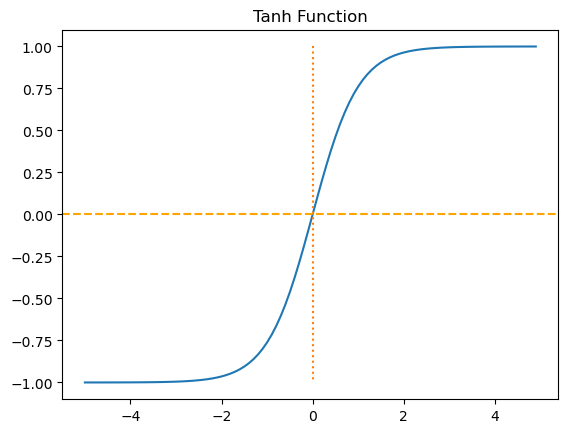

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0까지 0.1 간격으로 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0], [1.0,-1.0], ':')
plt.axhline(y=0, color = 'orange', linestyle = '--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생한다. \
but 하이퍼볼릭탄젠트 함수는 시그모이드와 달리 0을 중심으로 하고 있으며 하이퍼볼릭탄젠트 함수를 미분했을 때의 최대값은 \
1로 시그모이드 함수의 최대값인 0.25보다 크다. 그로인해 기울기 소실 증상이 적은편이며 은닉층에서 시그모이드 함수보다 선호된다.

(5) 렐루 함수(ReLU)
* 인공 신경망의 은닉층에서 가장 인기있는 함수이며, 수식은 f(x) = max(0,x)로 아주 간단하다.

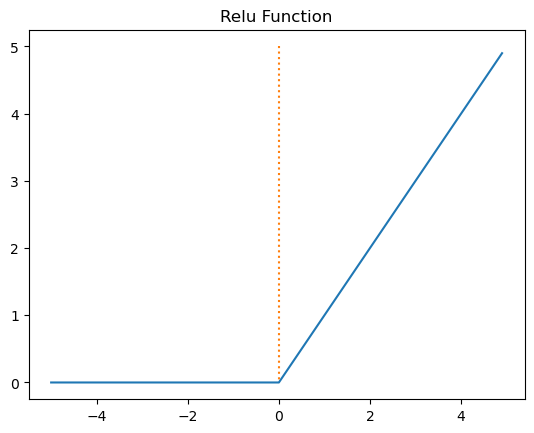

In [6]:
def relu(x) :
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하는 것이 특징인 함수로 출력값이 특정 양수 값에 수렴하지 않는다. \
0이상의 입력값의 경우에는 미분값이 항상 1이다. 깊은 신경망의 은닉층에서 시그모이드 함수보다 훨씬 더 잘 작동한다. \
렐루 함수는 앞의 함수들과는 달리 어떤 연산이 필요한게 아니라서 연산 속도도 빠르다.\
문제점으로는 입력값이 음수면 기울기. 즉, 미분값도 0이 된다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵다. 이 문제를 죽은 렐루라고 한다.

(6) 리키 렐루(Leaky ReLU)
* 죽은 렐루를 보완하기 위해 변형 함수들이 등장한다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환한다. \
수식은 f(x) = max(ax,x)로, a는 하이퍼파라미터로 Leaky 정도를 결정하며 일반적으로는 0.01의 값을 가진다.

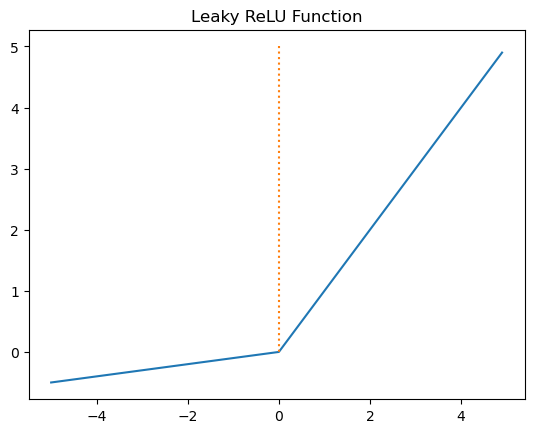

In [7]:
a = 0.1

def leaky_relu(x) :
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

위의 예시는 새는 모습을 확실하게 보여주기 위해 a = 0.1로 잡았다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않는다.

(7) 소프트맥스 함수(Softmax function)
* 은닉층에서 ReLU(또는 변형 ReLU 함수) 함수들을 사용하는 것이 일반적이다. 반면, 소프트맥스 함수는 출력층에서 주로 사용된다 \
딥러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 함수를 사용하고, 딥러닝으로 다중 클래스 분류를 풀 때는 출력층에 소프트맥스 함수를 사용한다. 

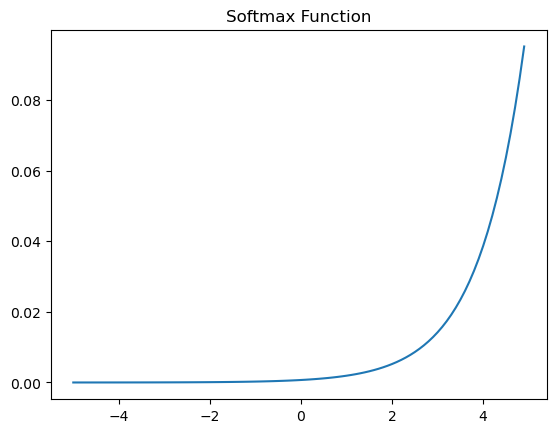

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()